<a href="https://colab.research.google.com/github/SambhramShetty2003/Agro_rover/blob/main/Soil_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import re
from scipy.stats import boxcox
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AGRO_ROVER/modified_plant_dataset.csv')
data=df.copy()

# Data exploration

In [ ]:
df.head()

,Unnamed: 0,Soil_Type,Sunlight_Hours,Region,Water_Frequency,Soil_moisture_data,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,0,loam,5.192294,West India,bi-weekly,20.749972,chemical,31.719602,61.591861,0
1,1,sandy,4.033133,North India,weekly,7.891786,organic,28.919484,52.422276,1
2,2,loam,8.892769,East India,bi-weekly,20.749972,none,23.179059,44.660539,0
3,3,loam,8.241144,East India,bi-weekly,20.749972,none,18.465886,46.433227,0
4,4,sandy,8.374043,East India,bi-weekly,15.327877,organic,18.128741,63.625923,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          193 non-null    int64  
 1   Soil_Type           193 non-null    object 
 2   Sunlight_Hours      193 non-null    float64
 3   Region              193 non-null    object 
 4   Water_Frequency     193 non-null    object 
 5   Soil_moisture_data  193 non-null    float64
 6   Fertilizer_Type     193 non-null    object 
 7   Temperature         193 non-null    float64
 8   Humidity            193 non-null    float64
 9   Growth_Milestone    193 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 15.2+ KB


In [ ]:
df.shape

(193, 10)

In [ ]:
df=df.drop(columns="Unnamed: 0",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soil_Type           193 non-null    object 
 1   Sunlight_Hours      193 non-null    float64
 2   Region              193 non-null    object 
 3   Water_Frequency     193 non-null    object 
 4   Soil_moisture_data  193 non-null    float64
 5   Fertilizer_Type     193 non-null    object 
 6   Temperature         193 non-null    float64
 7   Humidity            193 non-null    float64
 8   Growth_Milestone    193 non-null    int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 13.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Soil_moisture_data,193.0,21.836278,6.979835,7.891786,15.327877,23.784699,27.177496,32.472177
Temperature,193.0,25.076087,5.354170,15.200000,20.637096,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Analysis

Univariate analysis

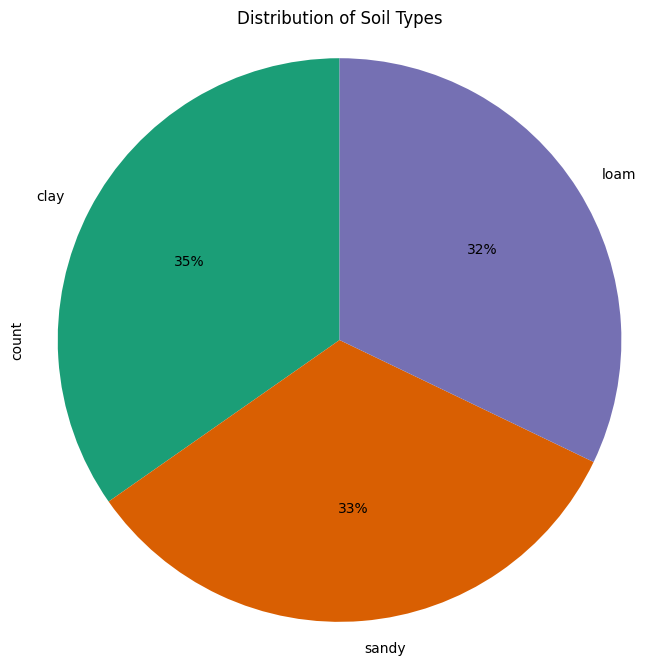

In [ ]:
# soil type data analysis
import matplotlib.pyplot as plt
soil_type_counts=df['Soil_Type'].value_counts()

fig1, ax =plt.subplots(figsize=(8,8))

soil_type_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Dark2').colors
)

ax.set_title('Distribution of Soil Types')
ax.axis('equal')
plt.show()

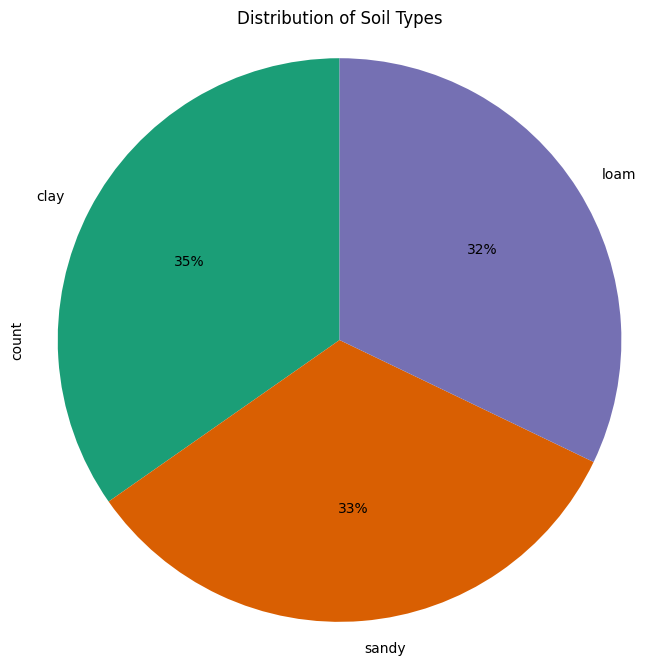

In [ ]:
import matplotlib.pyplot as plt

# soil type data analysis
soil_type_counts = df['Soil_Type'].value_counts()

# Ensure plt.subplots is a function before calling
# This line checks if plt.subplots is callable, and reassigns it if needed
if not callable(plt.subplots):
    plt.subplots = plt.figure().subplots  # Reassign to original functionality

fig1, ax = plt.subplots(figsize=(8, 8))

soil_type_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Dark2').colors
)

ax.set_title('Distribution of Soil Types')
ax.axis('equal')
plt.show()

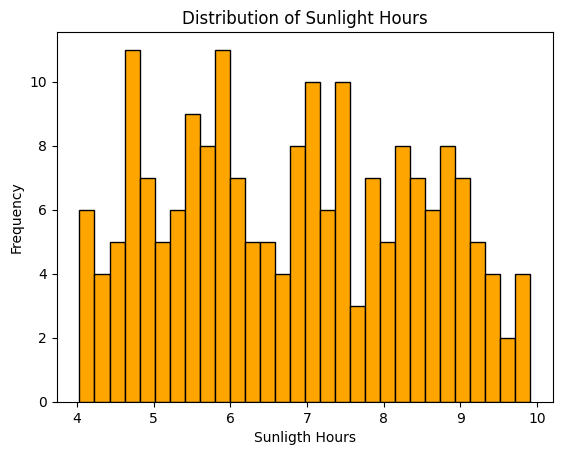

In [ ]:
# sunlight hours
plt.hist(df['Sunlight_Hours'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sunlight Hours')
plt.xlabel('Sunligth Hours')
plt.ylabel('Frequency')
plt.show()

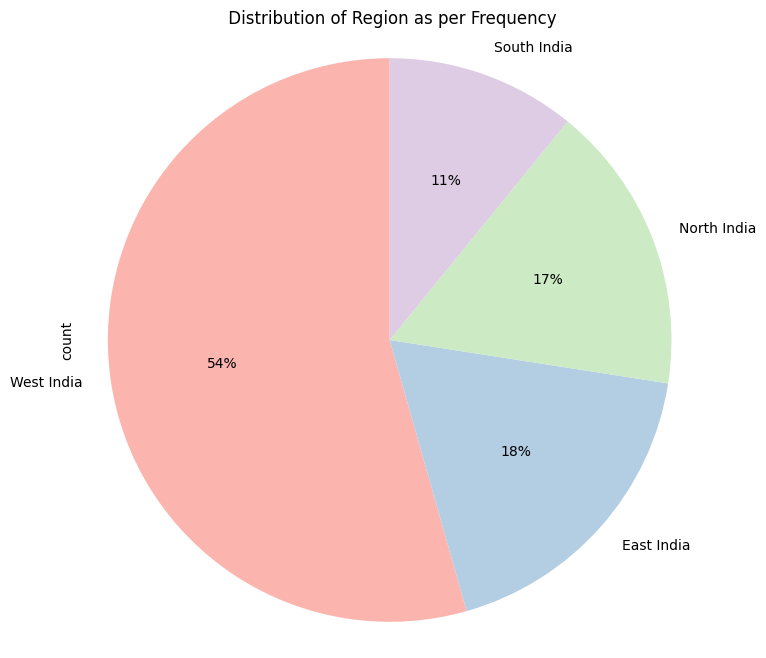

In [ ]:
# Region Plot
region_count=df['Region'].value_counts()

fig, ax =plt.subplots(figsize=(8,8))
region_count.plot.pie(
    ax=ax,
    autopct='%0.0f%%',
    startangle=90,
    colors=plt.get_cmap('Pastel1').colors
)

ax.set_title(" Distribution of Region as per Frequency")
ax.axis('equal')
plt.show()

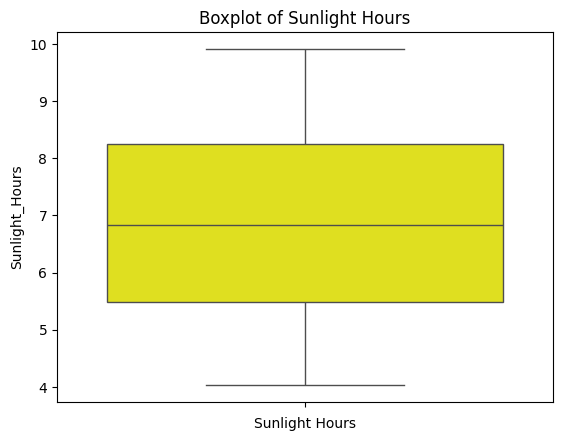

In [ ]:
# boxplot ofsunlight

sns.boxplot(df['Sunlight_Hours'], color='yellow')
plt.title("Boxplot of Sunlight Hours")
plt.xlabel("Sunlight Hours")
plt.show()

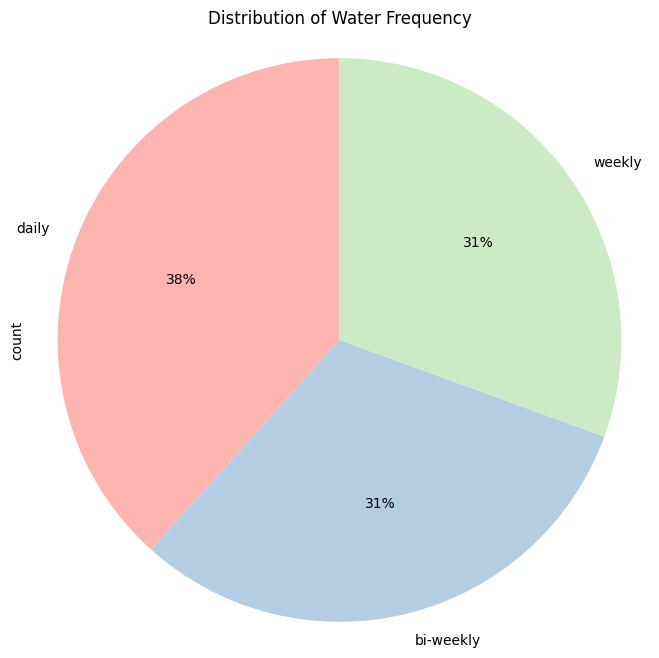

In [ ]:
#water fequency

water_frequency_count=df['Water_Frequency'].value_counts()

fig, ax=plt.subplots(figsize=(8,8))
water_frequency_count.plot.pie(
    ax=ax,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Pastel1').colors
)

ax.set_title("Distribution of Water Frequency")
ax.axis('equal')
plt.show()

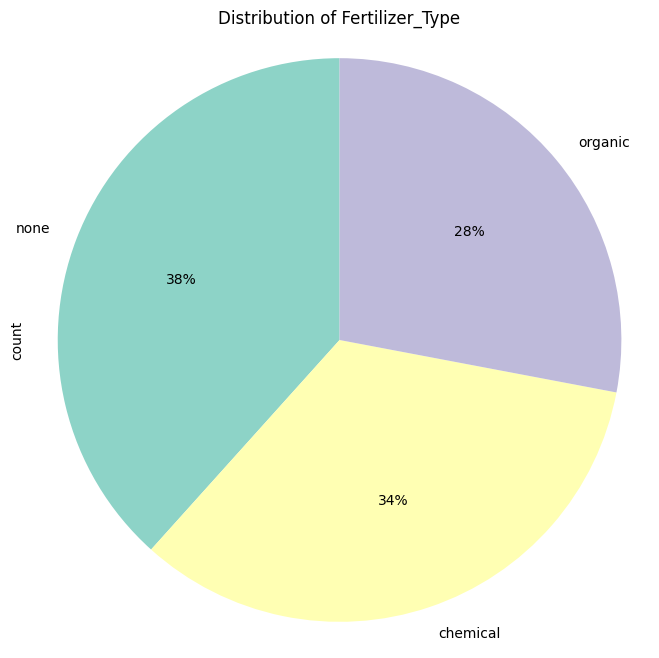

In [ ]:
#Fertilizer type

Fertilizer_Type_count=df['Fertilizer_Type'].value_counts()

fig, ax=plt.subplots(figsize=(8,8))
Fertilizer_Type_count.plot.pie(
    ax=ax,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Set3').colors
)

ax.set_title("Distribution of Fertilizer_Type")
ax.axis('equal')
plt.show()

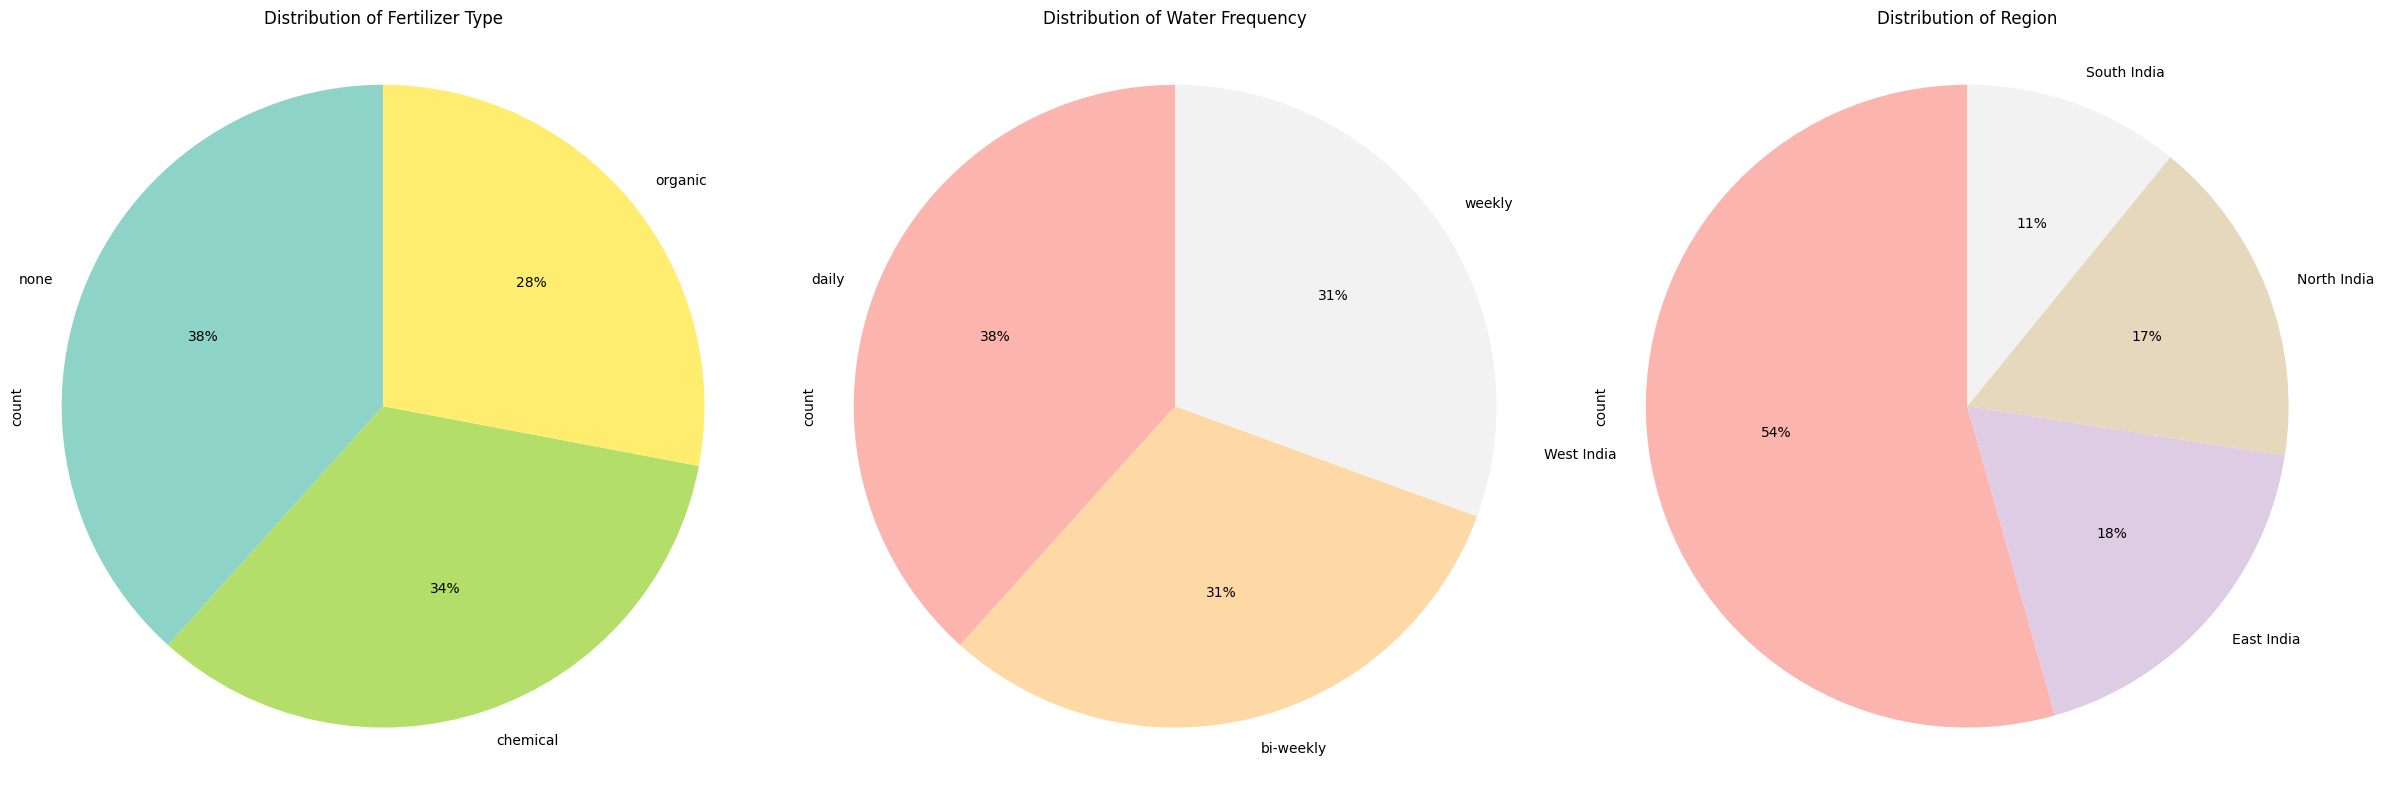

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Fertilizer Type Pie Chart
Fertilizer_Type_count = df['Fertilizer_Type'].value_counts()
Fertilizer_Type_count.plot.pie(
    ax=ax1,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Set3')(np.linspace(0, 1, len(Fertilizer_Type_count)))  # Corrected color selection
)
ax1.set_title("Distribution of Fertilizer Type")
ax1.axis('equal')  # Ensures the pie chart is circular

# Water Frequency Pie Chart
water_frequency_count = df['Water_Frequency'].value_counts()
water_frequency_count.plot.pie(
    ax=ax2,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Pastel1')(np.linspace(0, 1, len(water_frequency_count)))  # Corrected color selection
)
ax2.set_title("Distribution of Water Frequency")
ax2.axis('equal')  # Ensures the pie chart is circular

# Region Pie Chart
region_count = df['Region'].value_counts()
region_count.plot.pie(
    ax=ax3,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.get_cmap('Pastel1')(np.linspace(0, 1, len(region_count)))  # Corrected typo here
)
ax3.set_title("Distribution of Region")
ax3.axis('equal')  # Ensures the pie chart is circular

# Display the charts
plt.tight_layout()  # Adjusts spacing between plots
plt.show()



In [ ]:
numerical_columns=df.select_dtypes(include=['int64','float64'])
categorical_columns=df.select_dtypes(include=['object'])

print(f'Numerical columns { numerical_columns.columns }')
print(f'Categorical columns { categorical_columns.columns }')

Numerical columns Index(['Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity',
       'Growth_Milestone'],
      dtype='object')
Categorical columns Index(['Soil_Type', 'Region', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')


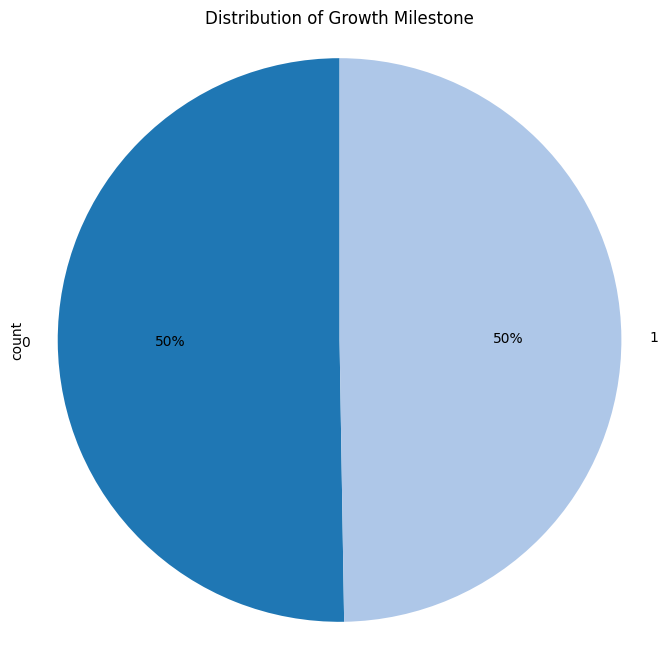

In [ ]:
# Getting the counts of each different Growth Milestone types
Growth_Milestone_counts = df['Growth_Milestone'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

Growth_Milestone_counts.plot.pie(
    ax=ax,
    autopct='%1.0f%%',  # For percentage
    startangle=90,      # For better view
    colors=plt.get_cmap('tab20').colors  # For Colors
)
ax.set_title('Distribution of Growth Milestone')
ax.axis('equal')

# Show the plot
plt.show()

['Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity', 'Growth_Milestone']


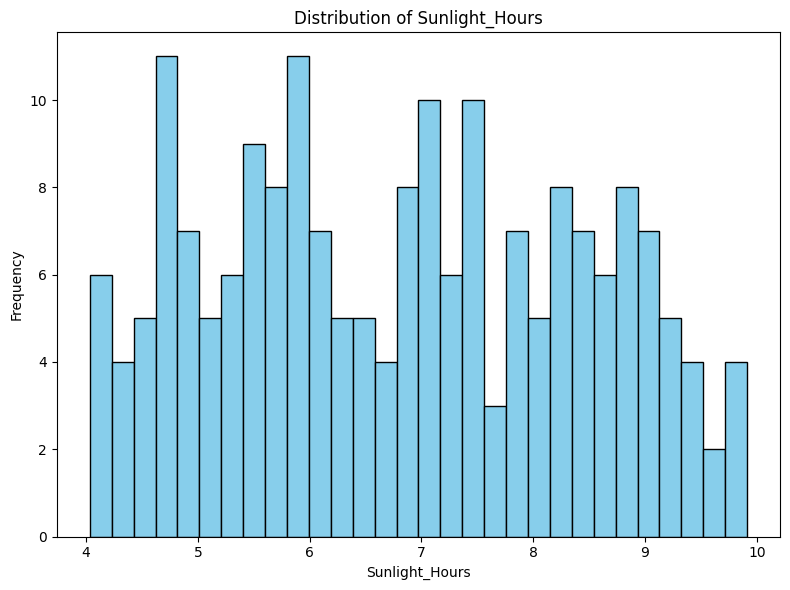

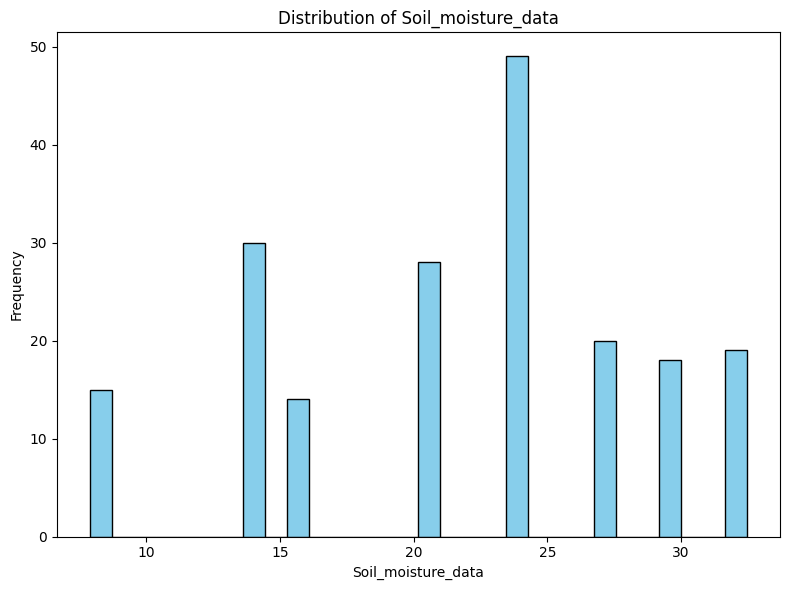

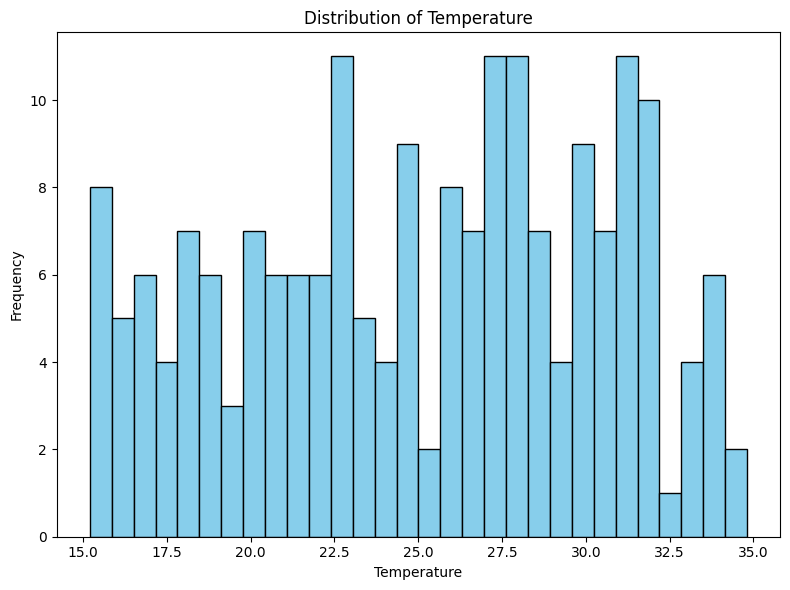

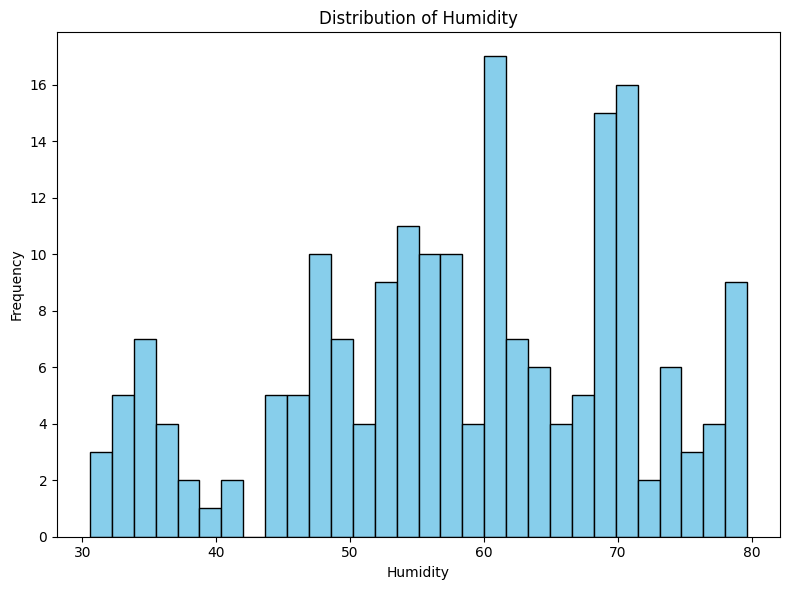

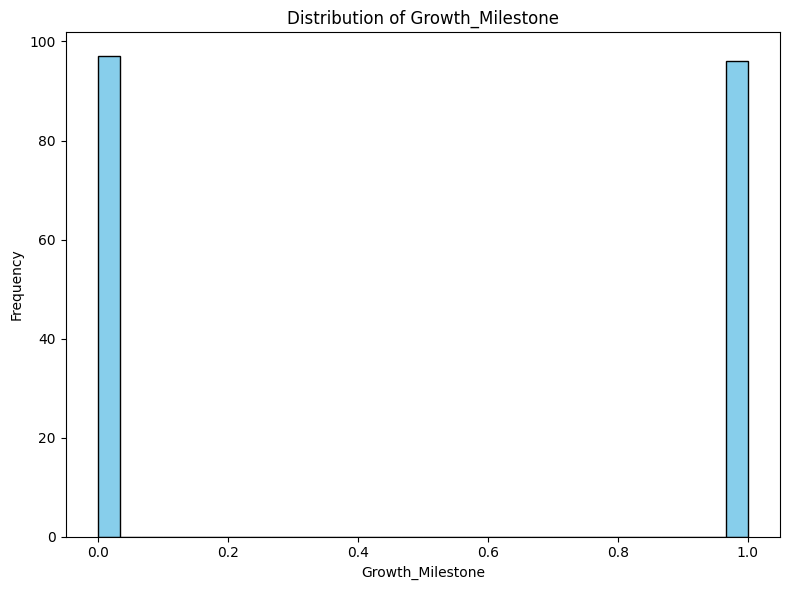

In [ ]:
numerical = numerical_columns.columns.to_list()
print(numerical)

for column in numerical:
    # Correct way to define figure size
    plt.figure(figsize=(8, 6))

    # Plot the histogram
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')  # Changed 'skyline' to 'skyblue'

    # Set the title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Optionally adjust the layout
    plt.tight_layout()

    # Display the plot
    plt.show()


Multivariate Analysis

In [ ]:
crosstable=pd.crosstab(df['Soil_Type'],df['Fertilizer_Type'])
print(crosstable)

Fertilizer_Type  chemical  none  organic
Soil_Type                               
clay                   25    24       18
loam                   17    24       21
sandy                  23    26       15


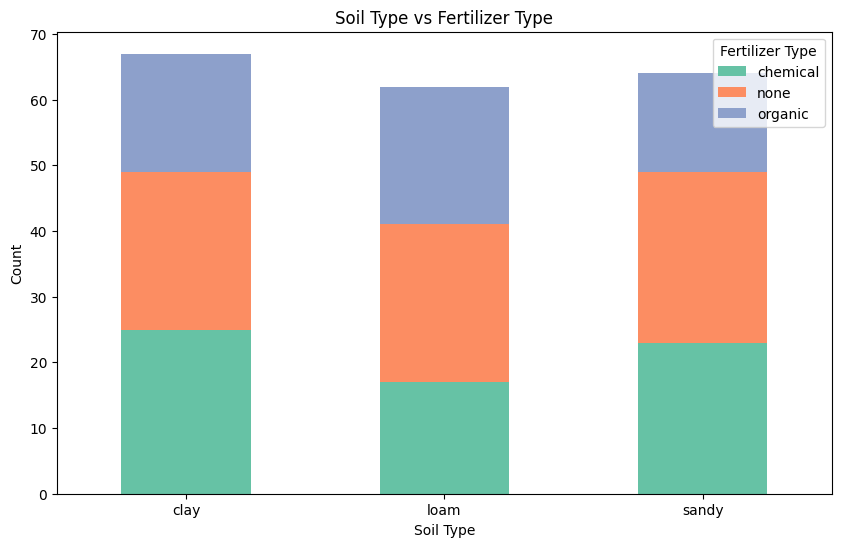

In [ ]:
# barplot of soil type and fertilizer

crosstable.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette('Set2'))
plt.title('Soil Type vs Fertilizer Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fertilizer Type')
plt.show()

In [ ]:
crosstable=pd.crosstab(df['Soil_Type'],df['Water_Frequency'])
print(crosstable)

Water_Frequency  bi-weekly  daily  weekly
Soil_Type                                
clay                    18     19      30
loam                    28     20      14
sandy                   14     35      15


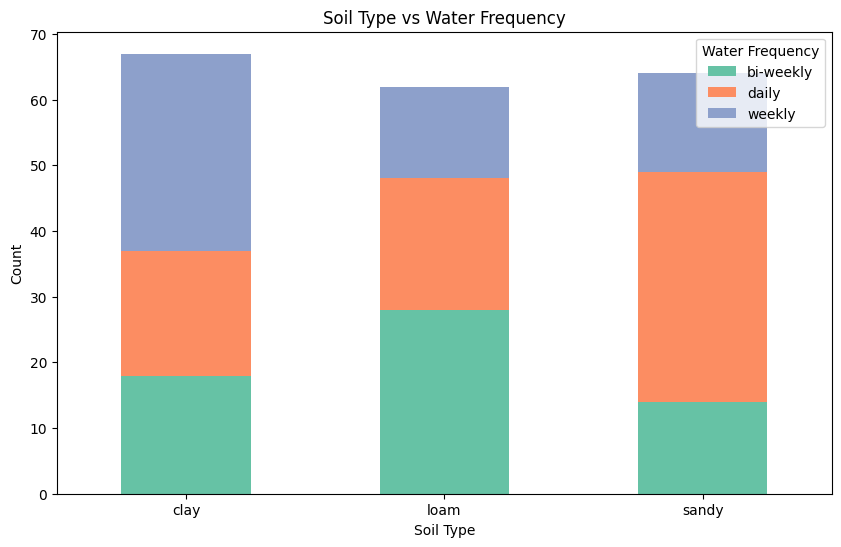

In [ ]:
# soil type and water frequency

crosstable.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette('Set2'))
plt.title('Soil Type vs Water Frequency')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Water Frequency')


In [ ]:
crosstable=pd.crosstab(df['Soil_Type'],df['Region'])
print(crosstable)

Region     East India  North India  South India  West India
Soil_Type                                                  
clay               10            3           10          44
loam               11           16            5          30
sandy              14           13            6          31


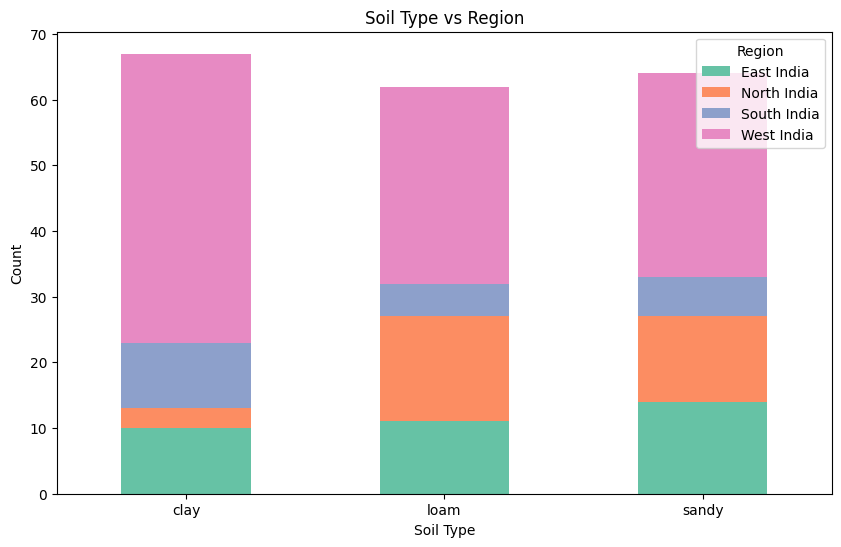

In [ ]:
# soil data vs region
crosstable.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette('Set2'))
plt.title('Soil Type vs Region')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Region')

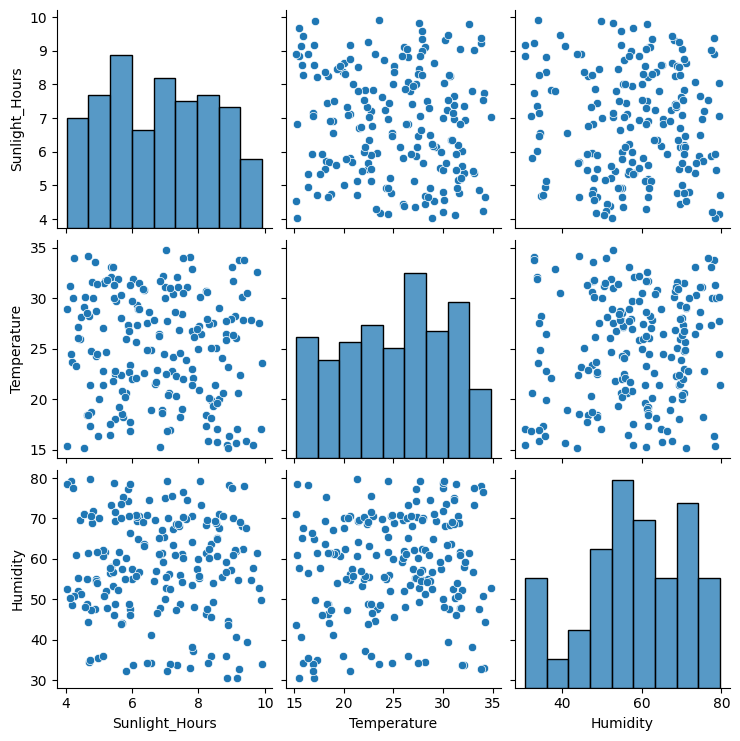

In [ ]:
sns.pairplot(df, vars=['Sunlight_Hours', 'Temperature', 'Humidity'])
plt.show()

Splitting the target from the other features

In [ ]:
X=df.drop(columns='Growth_Milestone', axis=1)
Y=df['Growth_Milestone']

As the target is categorical we can use ANOVA to know which numerical features affect it and we can use CHI_Square or mutual info for knowing what categorical features affects the target.

In [ ]:
#label encoding for categorical values
label_encoders={}
for col in X.select_dtypes(include='object').columns:
  le=LabelEncoder()
  X[col]=le.fit_transform(X[col])
  label_encoders[col]=le

In [ ]:
# Check of affecting changes form numerical dataset
numerical_features = X.select_dtypes(include=['float64'])
anova_f_values, anova_p_values = f_classif(numerical_features, Y)

anova_results = pd.DataFrame({
    'Feature': numerical_features.columns,
    'F-Value': anova_f_values,
    'p-Value': anova_p_values
})
print("ANOVA Results for Numerical Features:")
print(anova_results)

ANOVA Results for Numerical Features:
              Feature   F-Value   p-Value
0      Sunlight_Hours  2.895978  0.090428
1  Soil_moisture_data  0.025075  0.874348
2         Temperature  0.549833  0.459297
3            Humidity  3.300261  0.070836


In [ ]:
# Check of affecting changes form categorical dataset
categorical_features = X.select_dtypes(include='int64')
chi2_values, chi2_p_values = chi2(categorical_features, Y)

chi2_results = pd.DataFrame({
    'Feature': categorical_features.columns,
    'Chi2-Value': chi2_values,
    'p-Value': chi2_p_values
})
print("CHISQUARE Results for Categorical Features:")
print(chi2_results)

CHISQUARE Results for Categorical Features:
           Feature  Chi2-Value   p-Value
0        Soil_Type    0.130766  0.717640
1           Region    0.002491  0.960190
2  Water_Frequency    0.005155  0.942764
3  Fertilizer_Type    1.226920  0.268007


In [ ]:
# Mutual Information for all features
mutual_info_values = mutual_info_classif(X, Y)

mutual_info_results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_values
})
print("\nMutual Information for All Features:")
print(mutual_info_results)


Mutual Information for All Features:
              Feature  Mutual Information
0           Soil_Type            0.000000
1      Sunlight_Hours            0.000000
2              Region            0.067171
3     Water_Frequency            0.001514
4  Soil_moisture_data            0.004500
5     Fertilizer_Type            0.075818
6         Temperature            0.000000
7            Humidity            0.088736


# Data Preprocessing

In [ ]:
onehot_encoder = OneHotEncoder()

In [ ]:
X=data.drop(columns=['Growth_Milestone','Unnamed: 0'],axis=1)
Y=data['Growth_Milestone']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, stratify=Y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 8), (29, 8), (164,), (29,))

In [ ]:
categorical_columns = ['Soil_Type', 'Region', 'Water_Frequency', 'Fertilizer_Type']

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

# Apply OneHotEncoder to the selected categorical columns
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_columns]).toarray()

# Converting to a DataFrame with proper column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns
X_train = X_train.drop(categorical_columns, axis=1)

# Concatenating the original DataFrame with the encoded DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

# Display the new DataFrame
print(X_train.head())

   Sunlight_Hours  Soil_moisture_data  Temperature   Humidity  Soil_Type_clay  \
0        5.612000            7.891786    19.200000  61.600000             0.0   
1        6.127000           32.472177    25.700000  70.900000             1.0   
2        8.032813           32.472177    30.090857  79.310537             1.0   
3        4.244651           27.177496    34.001239  50.912152             0.0   
4        6.565246            7.891786    24.832317  34.241886             0.0   

   Soil_Type_loam  Soil_Type_sandy  Region_East India  Region_North India  \
0             0.0              1.0                0.0                 0.0   
1             0.0              0.0                0.0                 0.0   
2             0.0              0.0                1.0                 0.0   
3             1.0              0.0                0.0                 1.0   
4             0.0              1.0                0.0                 0.0   

   Region_South India  Region_West India  Water_Fr

In [ ]:
# Apply OneHotEncoder to the selected categorical columns
X_test_encoded = onehot_encoder.fit_transform(X_test[categorical_columns]).toarray()

# Converting to a DataFrame with proper column names
X_test_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Dropping the original categorical columns
X_test = X_test.drop(categorical_columns, axis=1)

# Concatenating the original DataFrame with the encoded DataFrame
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Display the new DataFrame
print(X_test.head())

   Sunlight_Hours  Soil_moisture_data  Temperature   Humidity  Soil_Type_clay  \
0        8.844641           14.179762    25.912336  59.168438             0.0   
1        9.449595           32.472177    30.528259  39.406058             1.0   
2        5.489000           24.274965    18.100000  69.400000             1.0   
3        4.461879           15.327877    28.173873  51.211100             0.0   
4        5.951100           14.179762    23.392001  47.545751             0.0   

   Soil_Type_loam  Soil_Type_sandy  Region_East India  Region_North India  \
0             0.0              1.0                0.0                 0.0   
1             0.0              0.0                0.0                 0.0   
2             0.0              0.0                1.0                 0.0   
3             1.0              0.0                0.0                 1.0   
4             0.0              1.0                0.0                 0.0   

   Region_South India  Region_West India  Water_Fr

In [ ]:
X_test.columns

Index(['Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity',
       'Soil_Type_clay', 'Soil_Type_loam', 'Soil_Type_sandy',
       'Region_East India', 'Region_North India', 'Region_South India',
       'Region_West India', 'Water_Frequency_bi-weekly',
       'Water_Frequency_daily', 'Water_Frequency_weekly',
       'Fertilizer_Type_chemical', 'Fertilizer_Type_none',
       'Fertilizer_Type_organic'],
      dtype='object')

In [ ]:
print(numerical_columns.columns)

Index(['Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity',
       'Growth_Milestone'],
      dtype='object')


Log transformation

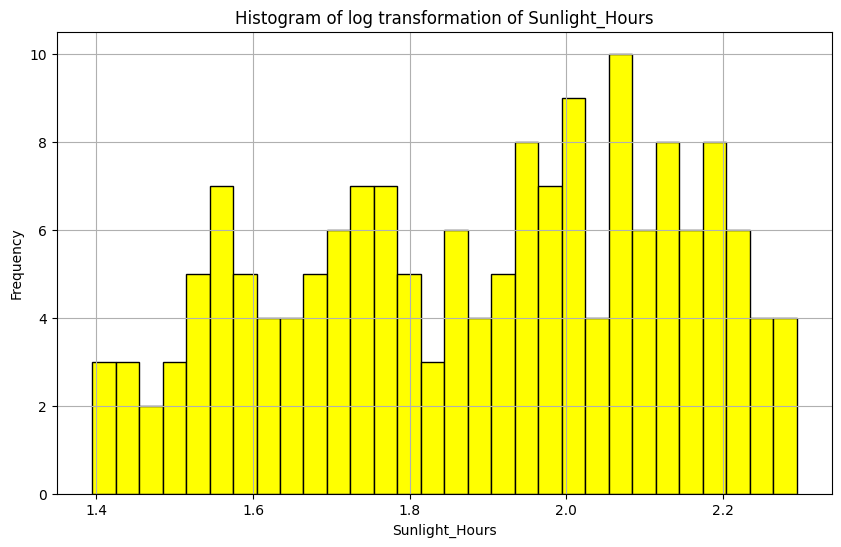

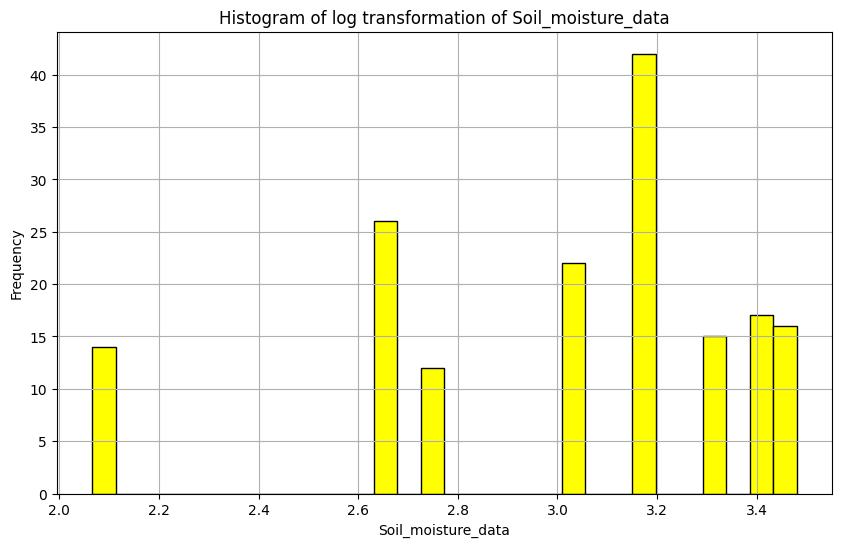

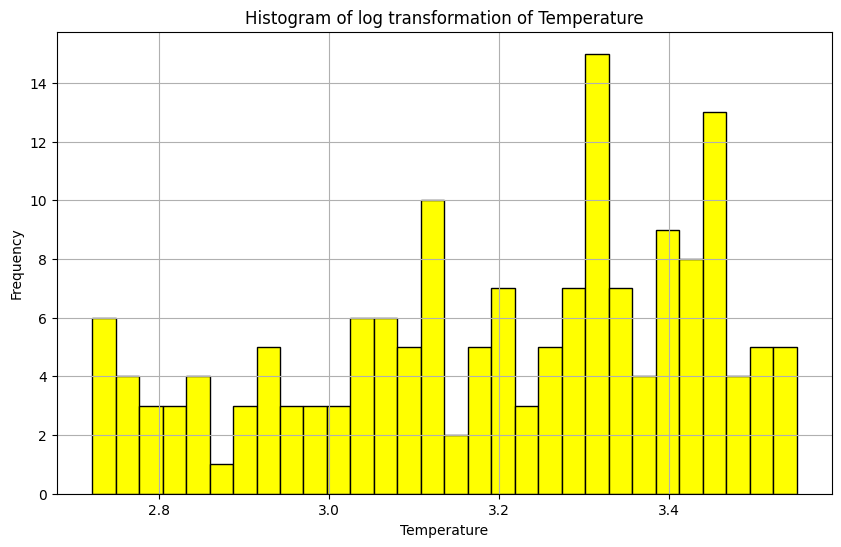

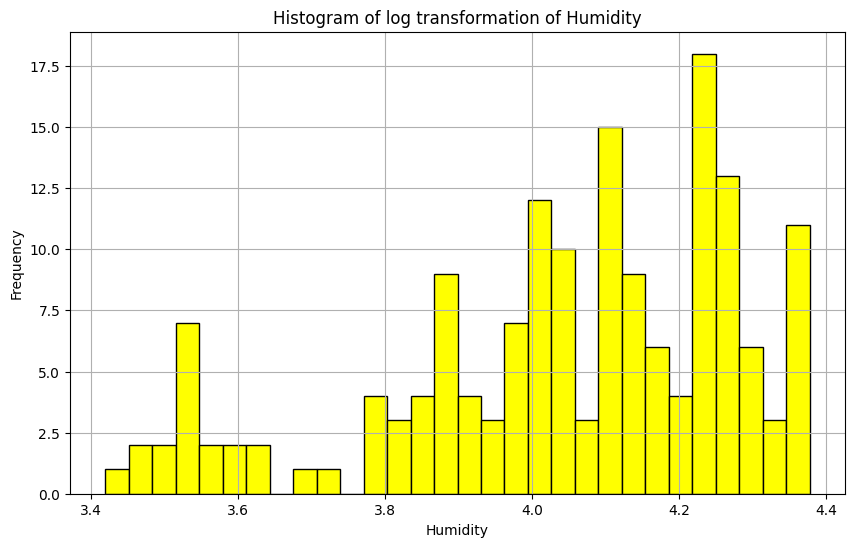

In [ ]:
numerical=['Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity']

for columns in numerical:
   plt.figure(figsize=(10, 6))
   plt.hist(np.log(X_train[columns]), bins=30, color='yellow', edgecolor='black')
   plt.xlabel(columns)
   plt.ylabel('Frequency')
   plt.title('Histogram of log transformation of ' + columns)
   plt.grid(True)
   plt.show()

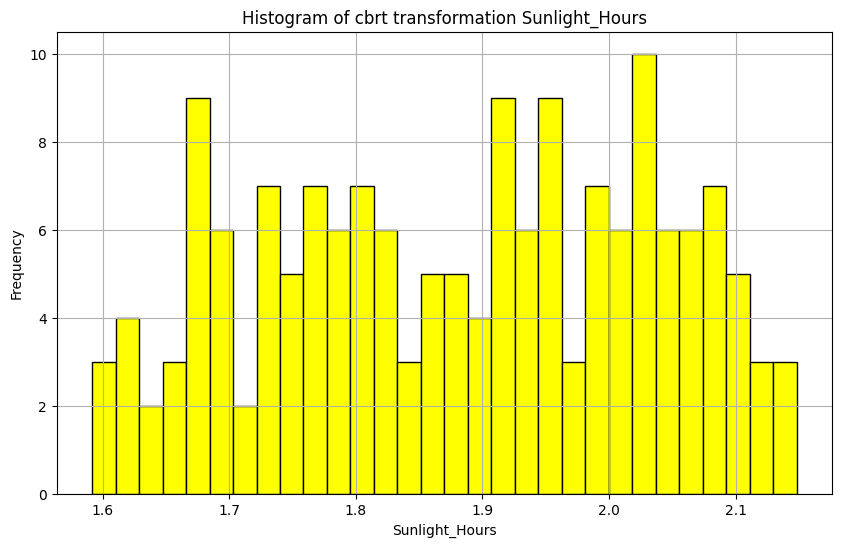

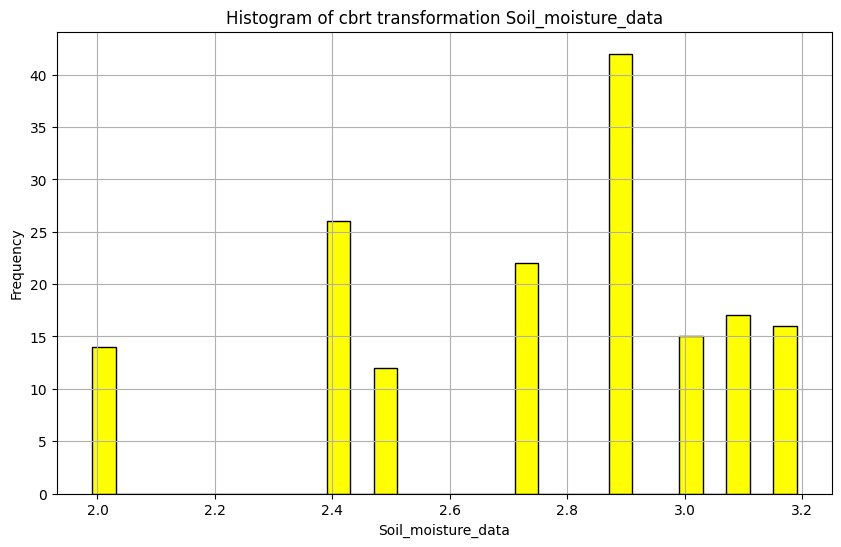

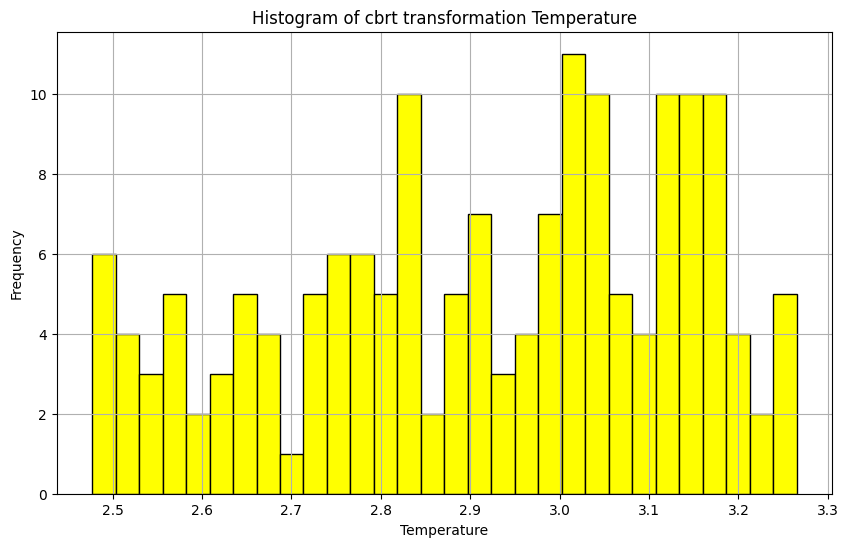

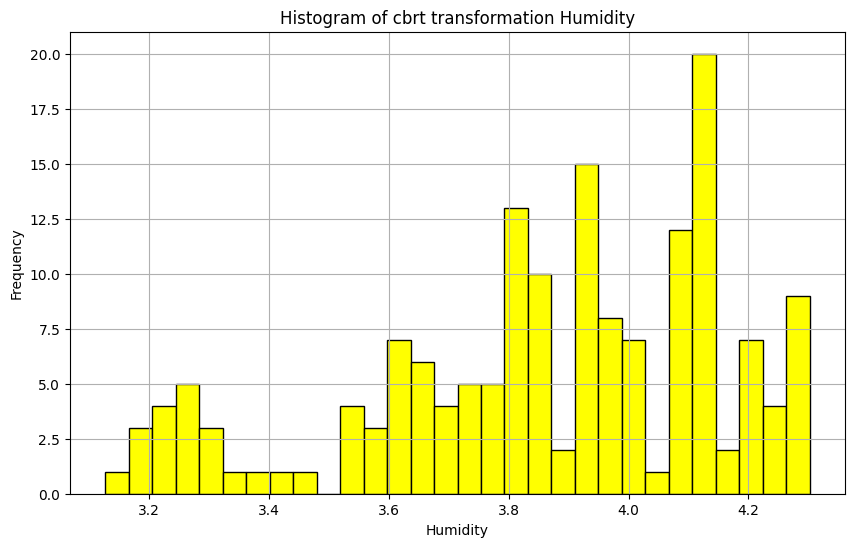

In [ ]:
 for columns in numerical:
  plt.figure(figsize=(10, 6))
  plt.hist(np.cbrt(X_train[columns]), bins=30, color='yellow', edgecolor='black')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.title('Histogram of cbrt transformation ' + columns)
  plt.grid(True)
  plt.show()

In [ ]:
scaler = StandardScaler()
X_train['Temperature'] = scaler.fit_transform(X_train[['Temperature']])
X_test['Temperature'] = scaler.transform(X_test[['Temperature']])

In [ ]:
scaler = StandardScaler()
X_train['Soil_moisture_data'] = scaler.fit_transform(X_train[['Soil_moisture_data']])
X_test['Soil_moisture_data'] = scaler.transform(X_test[['Soil_moisture_data']])

# Modeling

Dataset Supports classifier models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        82
           1       0.68      0.79      0.73        82

    accuracy                           0.71       164
   macro avg       0.71      0.71      0.71       164
weighted avg       0.71      0.71      0.71       164



In [ ]:
y_pred.shape, y_test.shape

((164,), (29,))

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(y_train, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        82
           1       0.71      0.15      0.24        82

    accuracy                           0.54       164
   macro avg       0.61      0.54      0.46       164
weighted avg       0.61      0.54      0.46       164



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=72)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_train, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        82
           1       0.63      0.72      0.67        82

    accuracy                           0.65       164
   macro avg       0.65      0.65      0.64       164
weighted avg       0.65      0.65      0.64       164



In [ ]:
nan_check = df.isna().sum()
print(nan_check)

Soil_Type             0
Sunlight_Hours        0
Region                0
Water_Frequency       0
Soil_moisture_data    0
Fertilizer_Type       0
Temperature           0
Humidity              0
Growth_Milestone      0
dtype: int64


Desigining the Model for predicition of the progressive or decressive

In [ ]:
X_train.values[75]

array([ 5.36761097, -0.90117113,  1.48262831, 73.42995641,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ])

In [ ]:
y_train.values[75]

np.int64(0)

'Sunlight_Hours', 'Soil_moisture_data', 'Temperature', 'Humidity',
       'Soil_Type_clay', 'Soil_Type_loam', 'Soil_Type_sandy',
       'Region_East India', 'Region_North India', 'Region_South India',
       'Region_West India', 'Water_Frequency_bi-weekly',
       'Water_Frequency_daily', 'Water_Frequency_weekly',
       'Fertilizer_Type_chemical', 'Fertilizer_Type_none',
       'Fertilizer_Type_organic'

In [ ]:
print('Anukrishi Predicitve model')
arr = []

arr.append(float(input('Enter the sunlight hours')))
arr.append(float(input('Enter the soil moisture data')))
arr[1] = scaler.transform([[arr[1]]])  # Assuming scaler is defined and works as intended
arr.append(input('Enter the temperature'))
arr[2] = scaler.transform([[arr[2]]])  # Assuming scaler is defined and works as intended
arr.append(float(input('Enter the humidity')))

# Get user input
soil_type = int(input("Enter the type of soil \n 1. Clay\n 2. Loam\n 3. Sandy\n"))

# Map the soil type to the corresponding index
if 1 <= soil_type <= 3:
    arr.extend([1 if soil_type == 1 else 0, 1 if soil_type == 2 else 0, 1 if soil_type == 3 else 0])
    # Use extend to add multiple elements at once


# Get user input for region
region = int(input("Enter the region \n 1. East India\n 2. North India\n 3. South India\n 4. West India\n"))

# Map the region type to the corresponding index
if 1 <= region <= 4:
    arr.extend([1 if region == 1 else 0, 1 if region == 2 else 0, 1 if region == 3 else 0, 1 if region == 4 else 0])
    # Use extend to add multiple elements at once

# Get user input for water frequency
frequency = int(input("Enter the water frequency \n 1. Bi-weekly\n 2. Daily\n 3. Weekly\n"))

# Map the frequency type to the corresponding index
if 1 <= frequency <= 3:
    arr.extend([1 if frequency == 1 else 0, 1 if frequency == 2 else 0, 1 if frequency == 3 else 0])
    # Use extend to add multiple elements at once

# Get user input for fertilizer type
fertilizer_type = int(input("Enter the fertilizer type \n 1. Chemical\n 2. None\n 3. Organic\n"))

# Map the fertilizer type to the corresponding index
if 1 <= fertilizer_type <= 3:
    arr.extend([1 if fertilizer_type == 1 else 0, 1 if fertilizer_type == 2 else 0, 1 if fertilizer_type == 3 else 0])
    # Use extend to add multiple elements at once

print(arr)

Anukrishi Predicitve model


In [ ]:
import numpy as np

# Define the nested structure
data = [arr]

# Flatten the structure and convert all elements to floats
flattened_data = []

for item in data[0]:  # Access the inner list
    if isinstance(item, np.ndarray):  # If the item is a NumPy array
        flattened_data.extend(item.flatten().astype(float))  # Flatten and convert to float
    else:
        flattened_data.append(float(item))  # Convert to float

print(flattened_data)


In [ ]:
import numpy as np

arr_0 = [arr]

# Convert elements within 'arr' to single numbers if they are arrays
modified_arr = [x.item() if isinstance(x, np.ndarray) else x for x in arr]

# Now create the NumPy array
arr_1 = np.array([modified_arr])  # Wrap in an extra list to get (1, 17) shape

arr_1 = arr_1.reshape(1, -1)
output=rf_classifier.predict(arr_1)

if output[0]==0:
  print('Decressive Growth Rate')
else:
  print('Progressive Growth Rate')


#Saving the trained model

In [ ]:
import pickle

In [ ]:
filename ='soil_growth_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

In [ ]:
loaded_model=pickle.load(open(filename, 'rb'))

In [ ]:
input_data=()